In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [3]:
##train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
##url = "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv"
train = pd.read_csv("D:\Jayashri AVS\IT\Datasets for DS\House_Price_Train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test = pd.read_csv("D:\Jayashri AVS\IT\Datasets for DS\House_Price_Test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
submission = pd.read_csv("D:\Jayashri AVS\IT\Datasets for DS\House_Price_Sample_Submission.csv")
submission.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Exploratory data Analysis

In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
train.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.describe(include=['float64']).T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


In [9]:
train.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
avg_stroke = train["SalePrice"].astype("float").mean(axis = 0)
print("Averge of Sale Price:", avg_stroke)

Averge of Sale Price: 180921.19589041095


In [11]:
train["SalePrice"].replace(np.nan, avg_stroke, inplace = True)
train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Probablity Plot

D:\Jayashri AVS\IT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


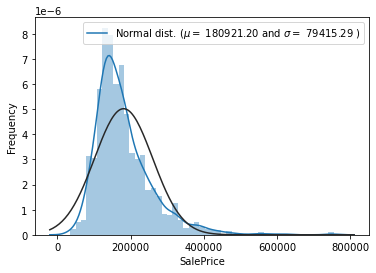

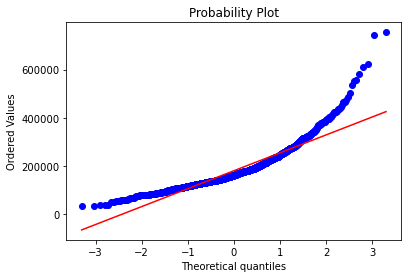

In [12]:
plt.subplots(figsize=(6,4))
sns.distplot(train['SalePrice'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

D:\Jayashri AVS\IT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


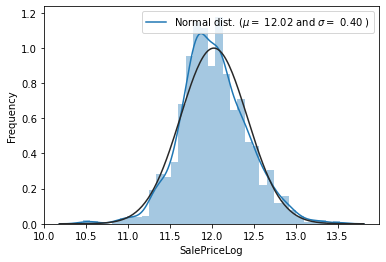

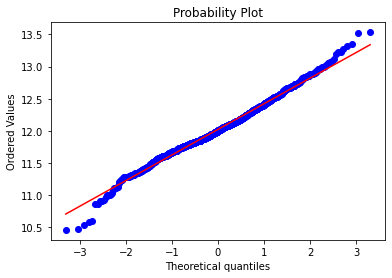

In [14]:
train['SalePriceLog'] = np.log1p(train['SalePrice'])

plt.subplots(figsize=(6,4))
sns.distplot(train['SalePriceLog'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePriceLog'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
fig = plt.figure()
stats.probplot(train['SalePriceLog'], plot=plt)
plt.show()

In [15]:
del train['SalePriceLog']

In [16]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


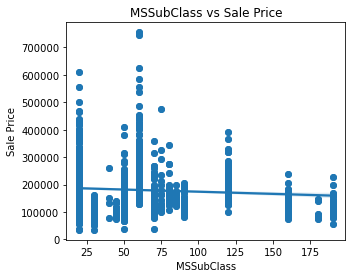

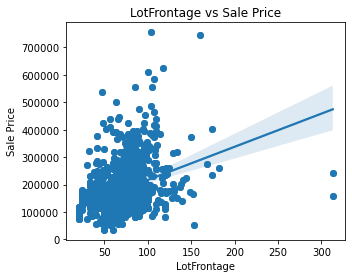

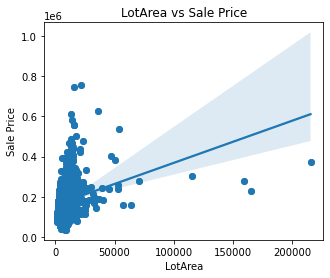

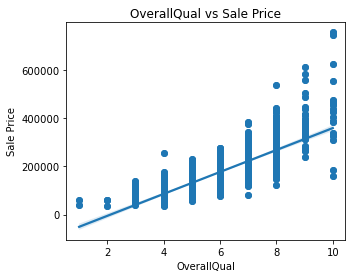

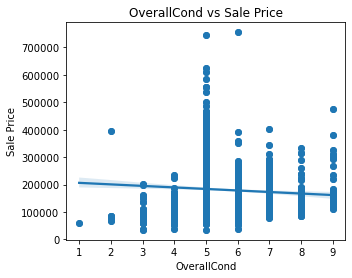

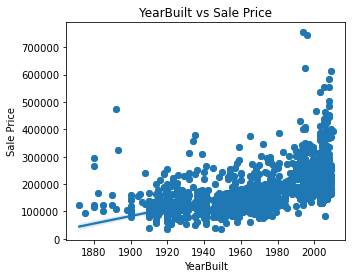

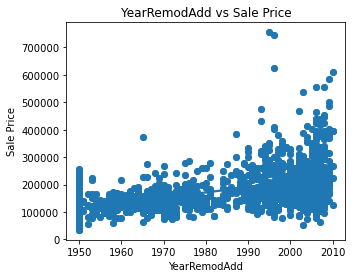

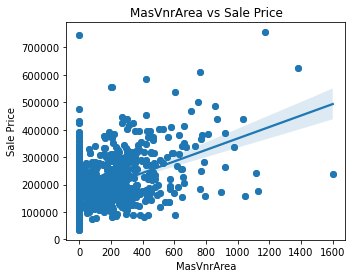

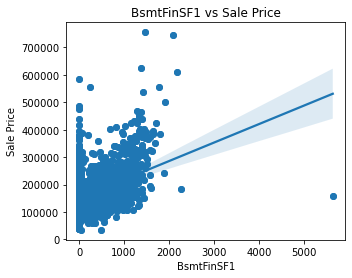

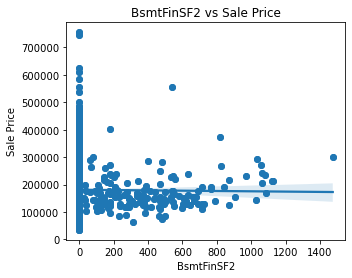

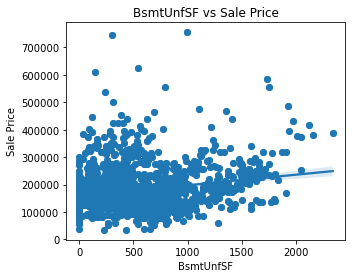

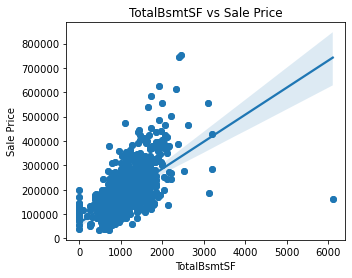

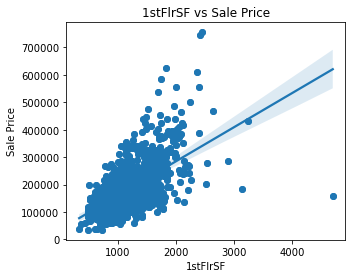

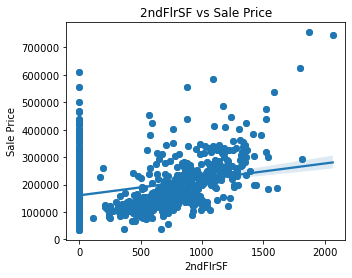

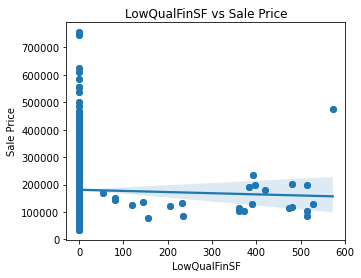

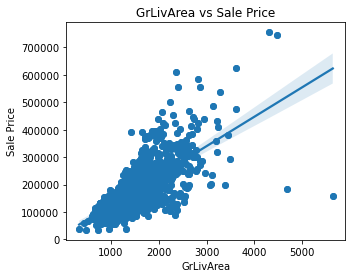

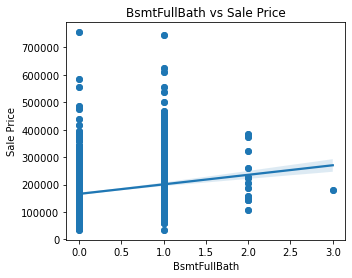

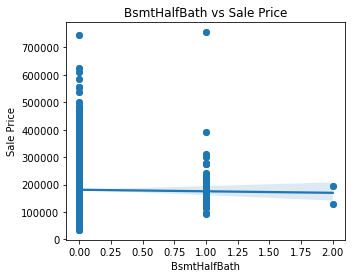

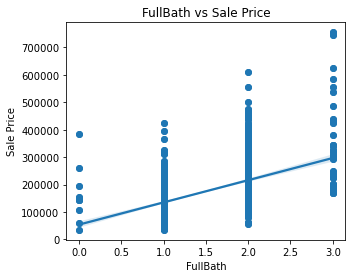

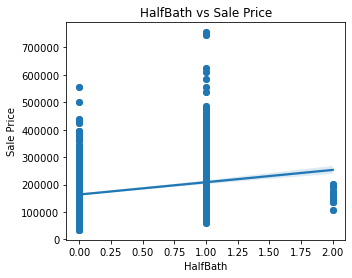

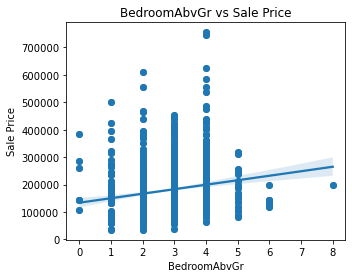

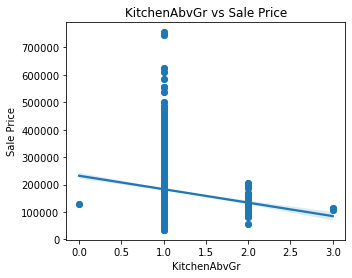

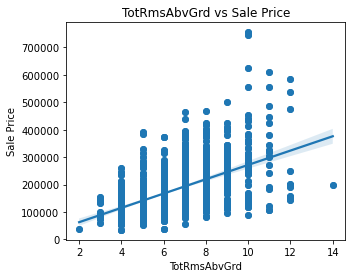

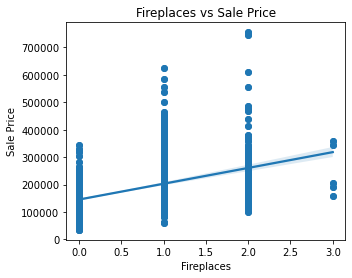

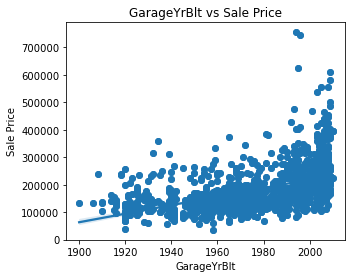

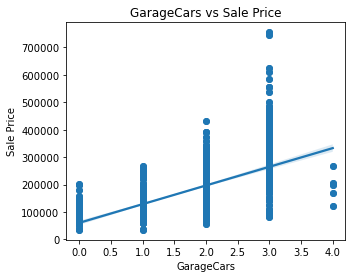

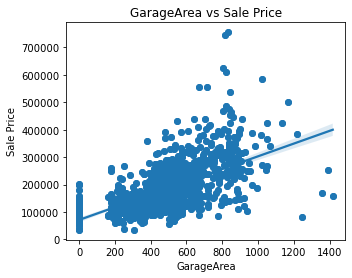

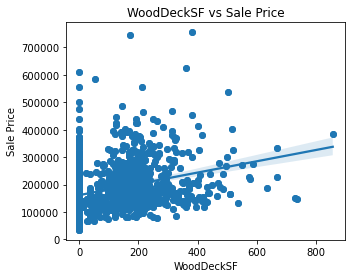

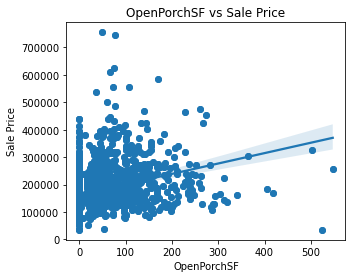

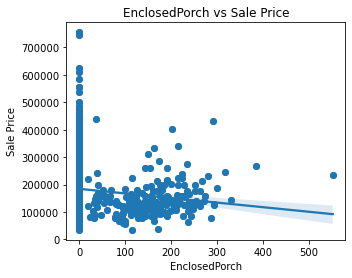

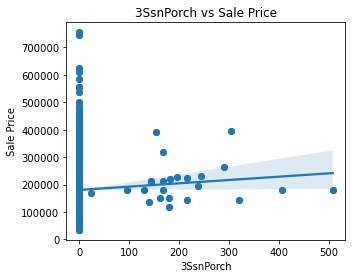

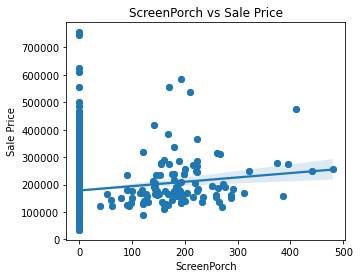

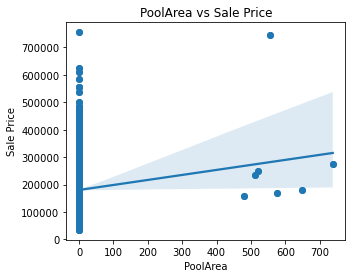

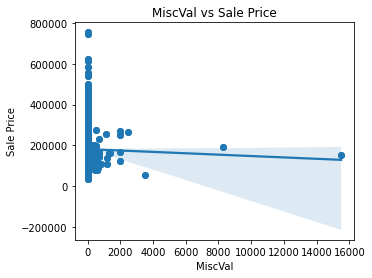

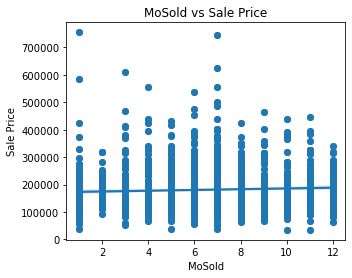

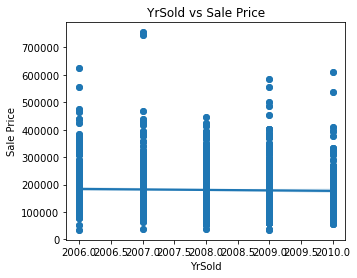

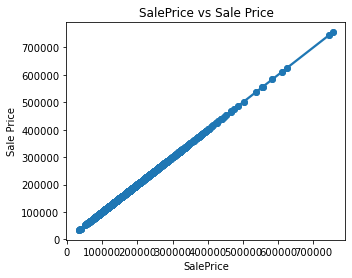

In [17]:
# Exclude ID column 
numeric_features = numeric_features.drop('Id', axis=1)

# Loop through each feature 
for col in numeric_features:
    plt.figure(figsize=(5,4))
    plt.scatter(train[col], train['SalePrice'])
    
    sns.regplot(x=col, y='SalePrice', data=train)
    
    plt.title(col + ' vs Sale Price')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    
    plt.show()

C:\Users\91724\AppData\Local\Temp\ipykernel_17928\2955365087.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5, 4))


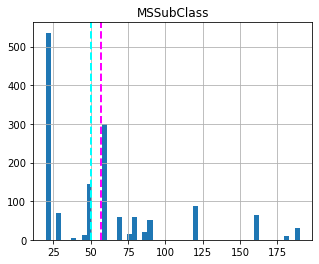

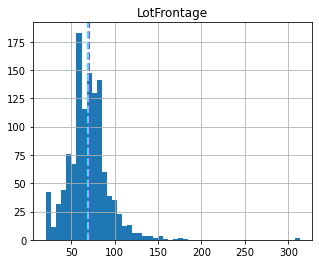

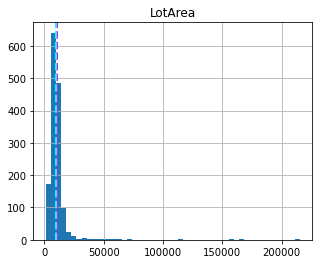

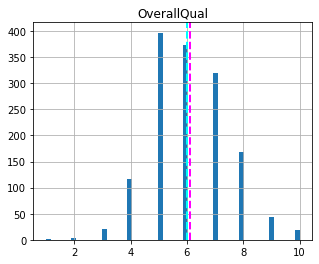

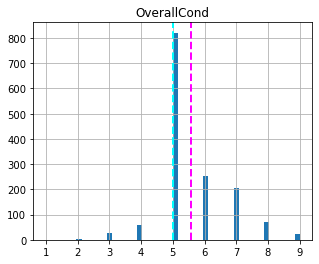

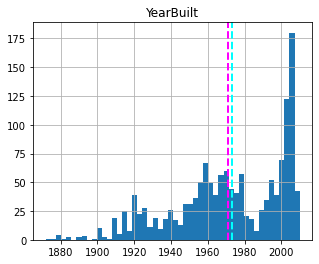

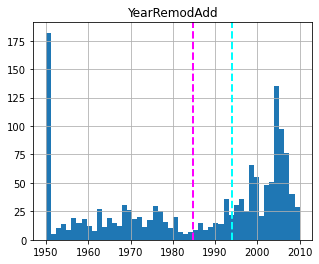

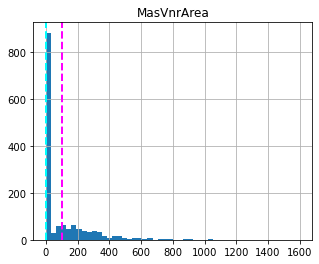

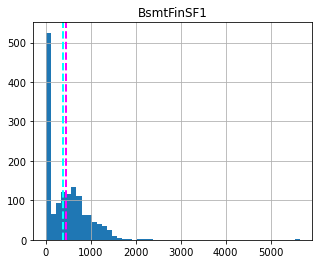

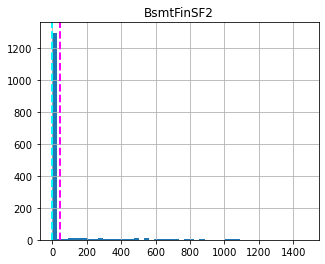

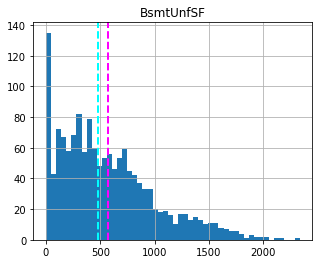

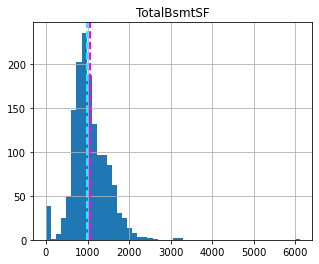

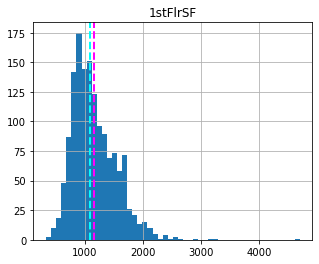

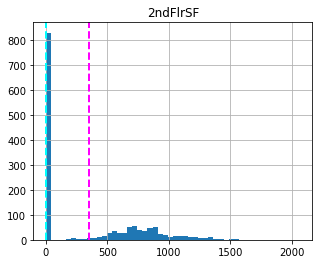

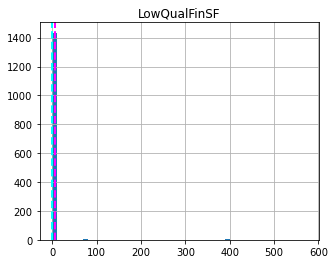

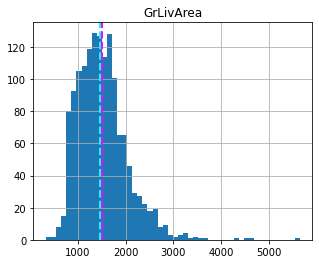

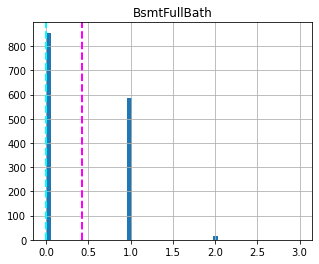

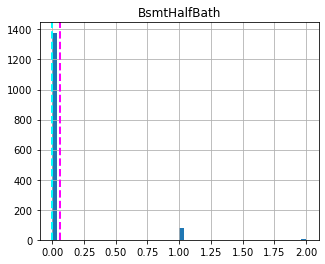

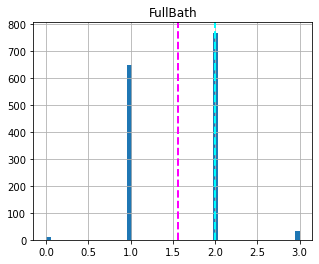

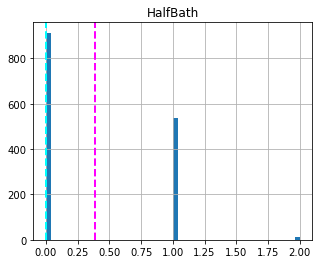

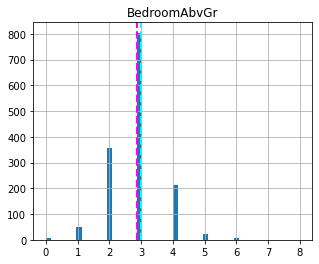

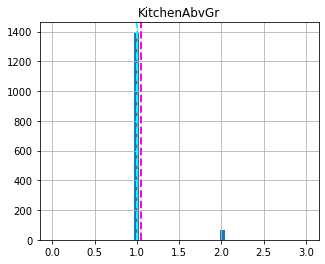

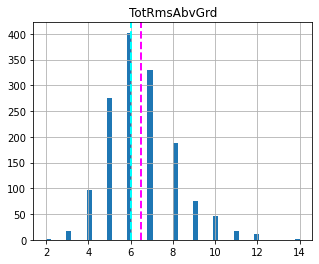

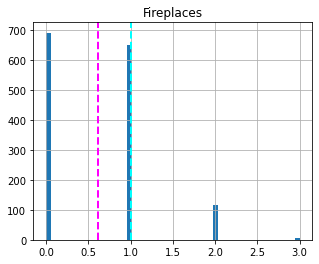

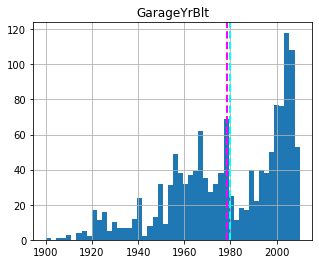

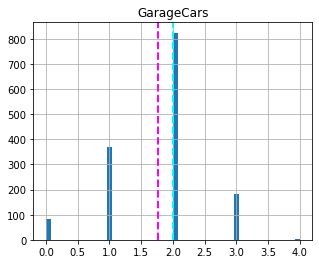

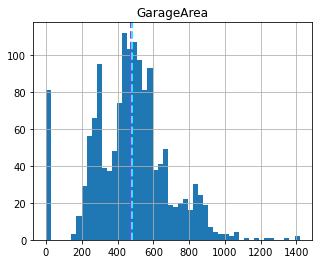

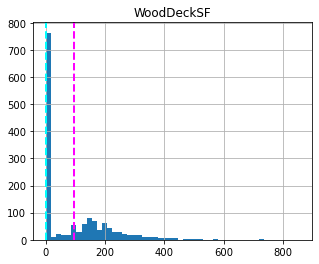

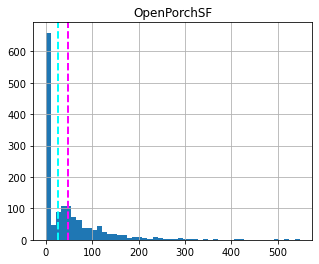

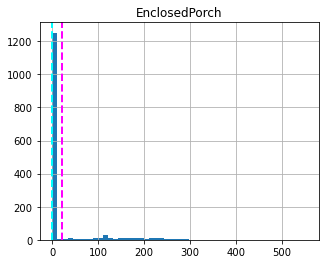

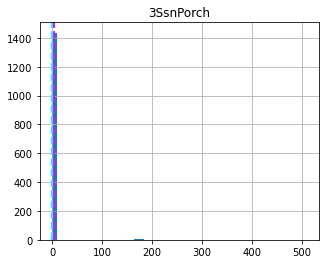

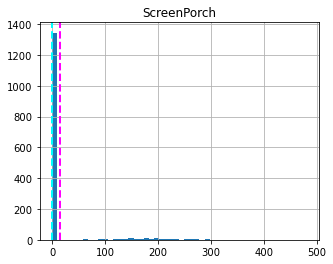

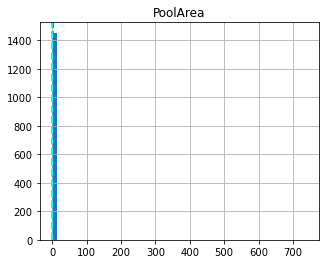

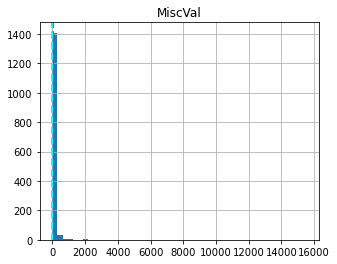

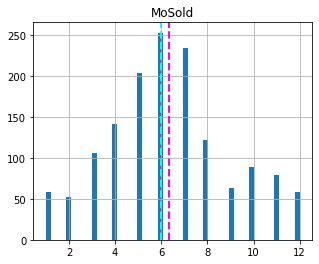

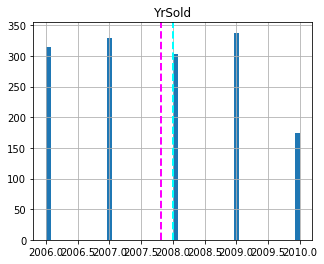

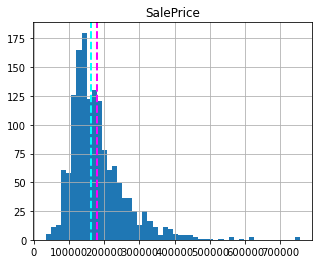

In [18]:
for col in numeric_features:
    fig = plt.figure(figsize=(5, 4))
    ax = fig.gca()
    feature = train[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Explanatory data analysis

<BarContainer object of 1460 artists>

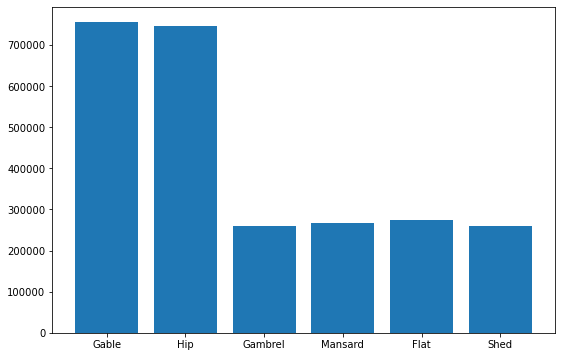

In [19]:
figure= plt.subplots(figsize=(9,6))
plt.bar(train['RoofStyle'], train['SalePrice'])

<BarContainer object of 1460 artists>

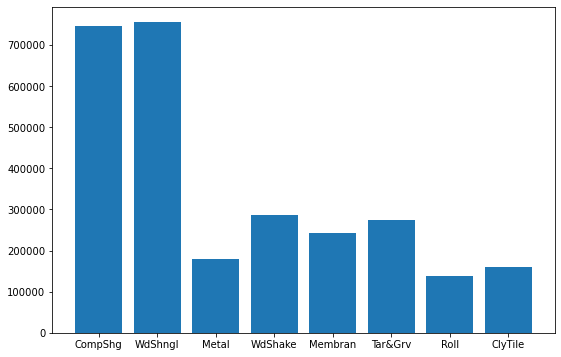

In [20]:
figure= plt.subplots(figsize=(9,6))
plt.bar(train['RoofMatl'], train['SalePrice'])

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

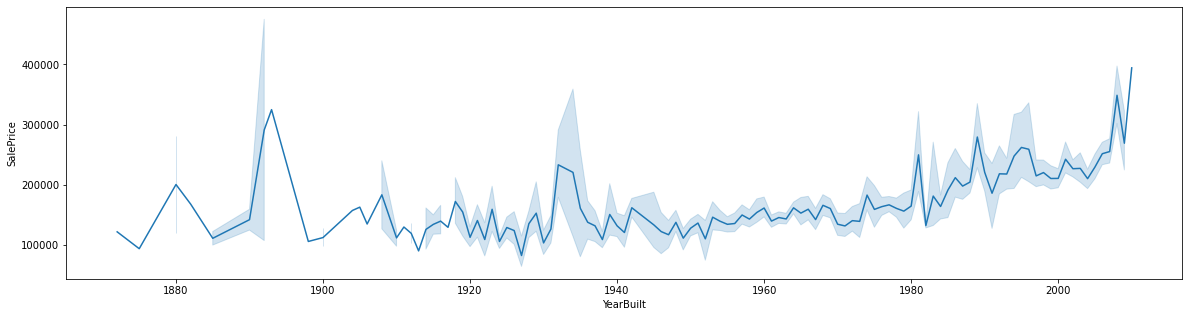

In [21]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train, x="YearBuilt", y="SalePrice")

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

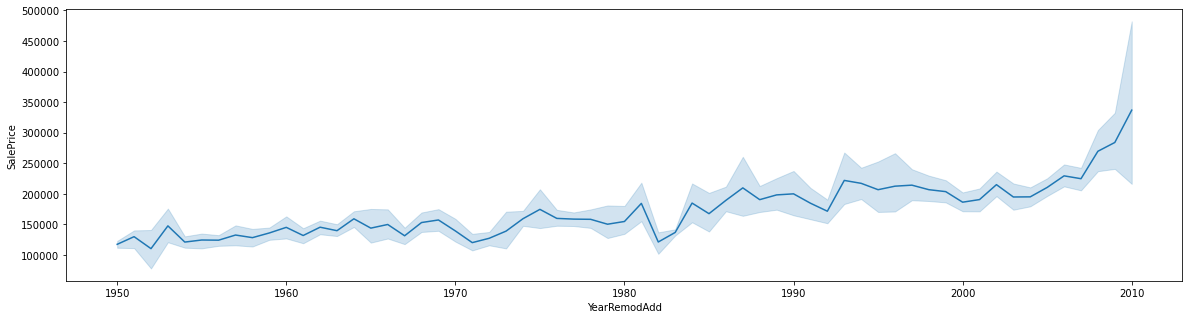

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train, x="YearRemodAdd", y="SalePrice")

<BarContainer object of 1460 artists>

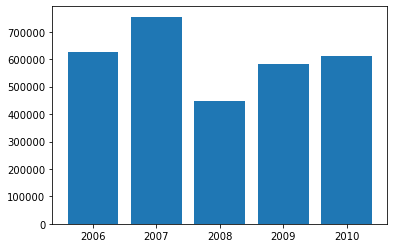

In [23]:
#sns.countplot(x='YrSold', data=train)

plt.bar(train['YrSold'], train['SalePrice'])

<BarContainer object of 1460 artists>

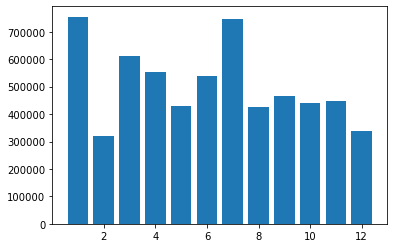

In [30]:
# sns.countplot(x='MoSold', data=train)

plt.bar(train['MoSold'], train['SalePrice'])

<BarContainer object of 1460 artists>

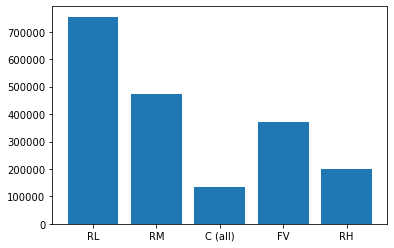

In [24]:
# sns.countplot(x='MSZoning', data=train)

plt.bar(train['MSZoning'], train['SalePrice'])

<AxesSubplot:ylabel='SaleCondition'>

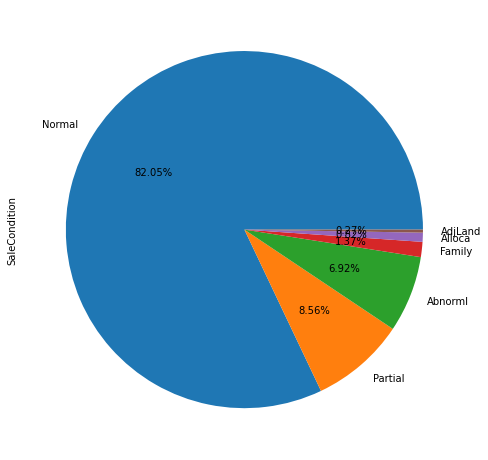

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
train['SaleCondition'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

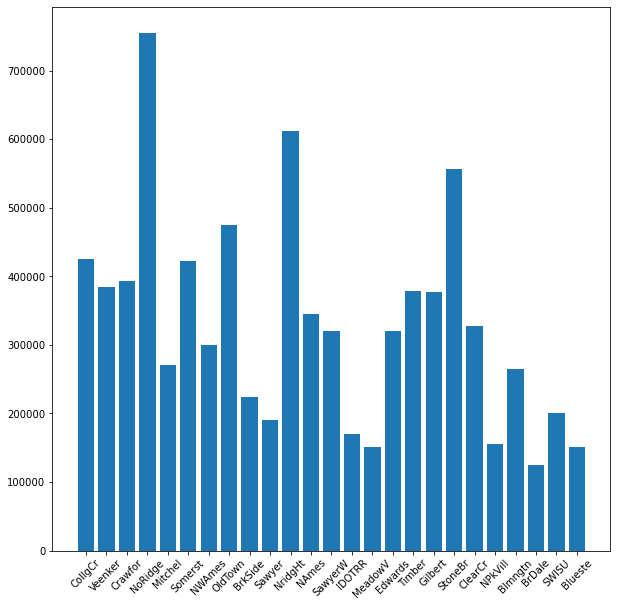

In [26]:
# sns.countplot(x='Neighborhood', data=train)

plt.figure(figsize=(10,10))
plt.bar(train['Neighborhood'], train['SalePrice'])
plt.xticks(rotation= 45)

Missing values

In [27]:
miss_col_train = train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=True)
percent_miss_train = round((miss_col_train / len(train) * 100) , 2)
missing_train = pd.DataFrame([miss_col_train, percent_miss_train]).T.rename(columns={0:'Feature', 1:'missing'})
missing_train

,Feature,missing
Electrical,1.0,0.07
MasVnrType,8.0,0.55
MasVnrArea,8.0,0.55
BsmtQual,37.0,2.53
BsmtCond,37.0,2.53
BsmtFinType1,37.0,2.53
BsmtExposure,38.0,2.60
BsmtFinType2,38.0,2.60
GarageCond,81.0,5.55
GarageQual,81.0,5.55


In [28]:
train.fillna(value=0, inplace=True)

# Replace infinite values with a large finite value or np.nan, and then handle the np.nan values as before
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(value=0, inplace=True)

In [29]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Corralation

<AxesSubplot:>

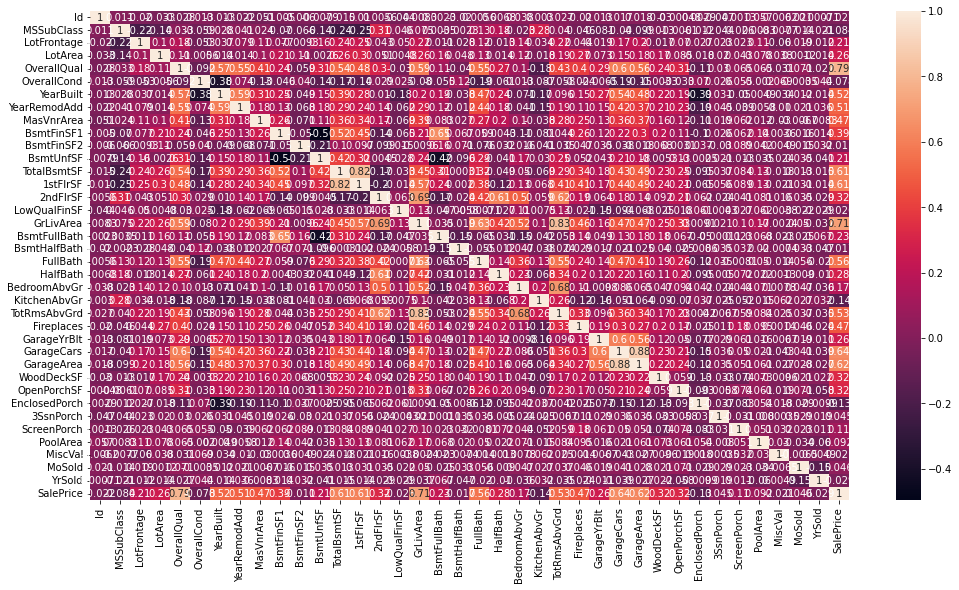

In [30]:
train_corr = train.select_dtypes(include=[np.number])

corr = train_corr.corr()
plt.subplots(figsize=(17,9))
sns.heatmap(corr, annot=True)

In [31]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Top Corralation train attributes with sale-price

In [32]:
# Top 50% Corralation train attributes with sale-price

important_num_cols = list(train.corr()["SalePrice"][(train.corr()["SalePrice"]>0.5)|(train.corr()["SalePrice"]<-0.5)].index)
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [41]:
train.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [33]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
top_feature

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [34]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']

In [35]:
numcols = train[train.columns.intersection(top_feature)]
numcols.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


<AxesSubplot:>

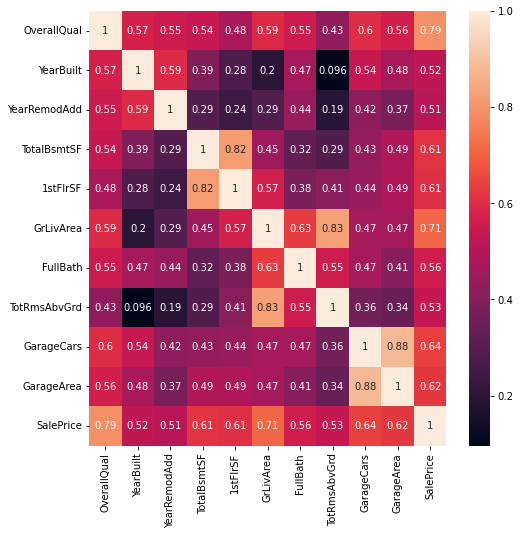

In [36]:
numcols = train[train.columns.intersection(top_feature)]
plt.figure(figsize=(8,8))
sns.heatmap(numcols.corr(), annot=True)

In [37]:
# top_feature = corr.index[abs(corr['SalePrice']>0.5)]
# plt.subplots(figsize=(9, 8))
# top_corr = train[top_feature].corr()
# sns.heatmap(top_corr, annot=True)
# plt.show()

In [38]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=train.OverallQual, y=train.SalePrice)

# train.OverallQual.nunique()

D:\Jayashri AVS\IT\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


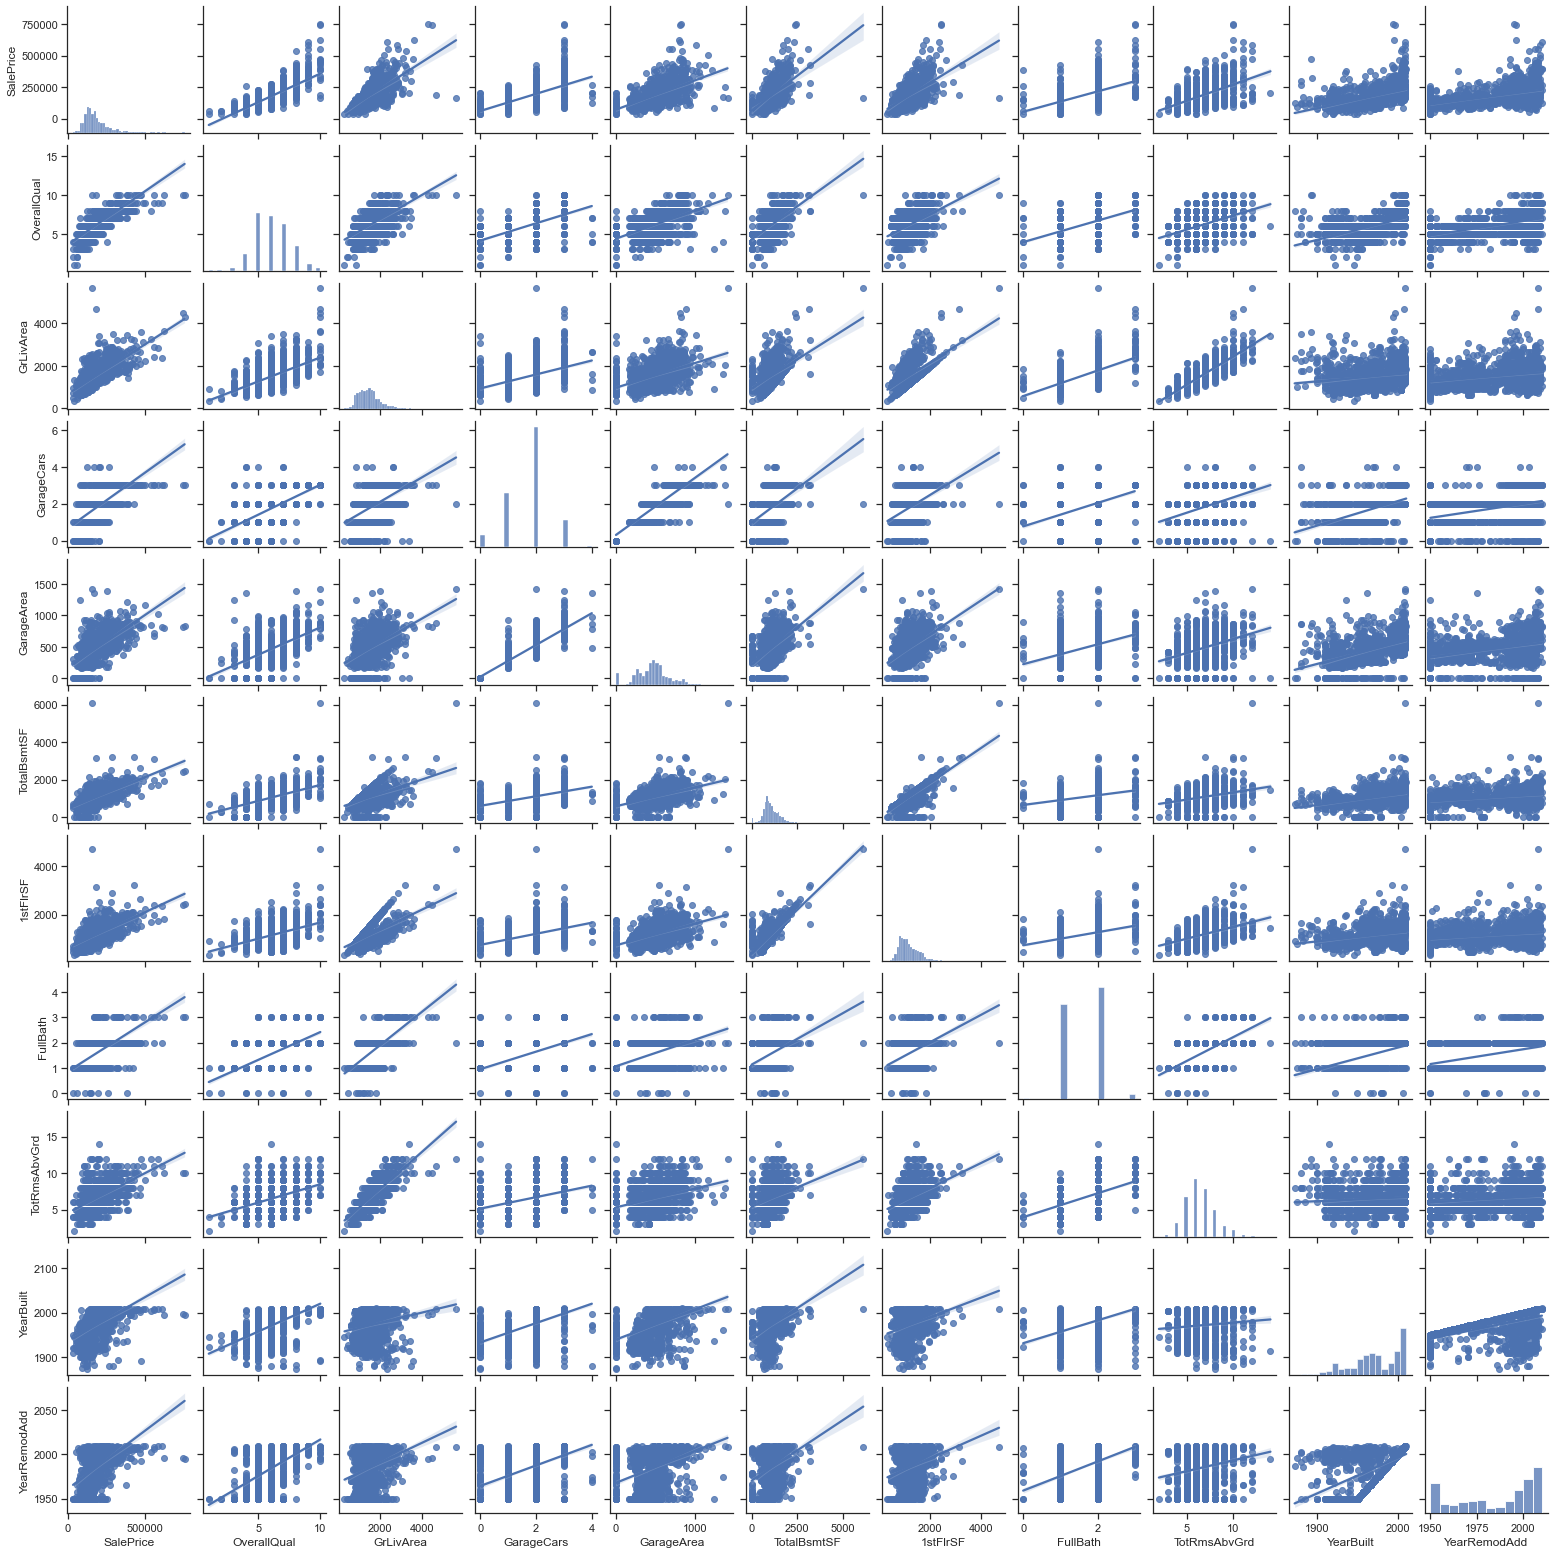

In [39]:
sns.set(style='ticks')
sns.pairplot(train[col], size=2, kind='reg')

In [41]:
train[col].replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


In [42]:
train[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   GarageCars    1460 non-null   int64
 4   GarageArea    1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   1stFlrSF      1460 non-null   int64
 7   FullBath      1460 non-null   int64
 8   TotRmsAbvGrd  1460 non-null   int64
 9   YearBuilt     1460 non-null   int64
 10  YearRemodAdd  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [43]:
train[col].isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [50]:
# train = train[col].fillna(int(0))
# train.info()

In [44]:
print(train[col].duplicated().sum())

train[col].drop_duplicates(inplace=True)

0


C:\Users\91724\AppData\Local\Temp\ipykernel_17928\3215540464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col].drop_duplicates(inplace=True)


Split and Normalize Data

In [46]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
    ''' Take the different set of parameter and prints evaluation metrics '''
    MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=(np.sqrt(MSE))
    R2=(r2_score(y_true=yt,y_pred=yp))
    Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
    if disp=="on":
        print("MSE :",MSE,"RMSE :", RMSE)
        print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)
    
    #Plotting Actual and Predicted Values
    plt.figure(figsize=(18,6))
    plt.plot((yp)[:100]) 
    plt.plot((np.array(yt)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Time Duration')
    
    return (MSE,RMSE,R2,Adjusted_R2) 

In [53]:
# important_num_cols = list(train.corr()["SalePrice"][(train.corr()["SalePrice"] > 0.5) | (train.corr()["SalePrice"]<-0.5)].index)

# numcols = train[train.columns.intersection(important_num_cols)]
# numcols.head()

In [47]:
X = numcols.drop('SalePrice', axis=1)
y = numcols['SalePrice']

In [48]:
X = pd.DataFrame(X)
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836


In [49]:
# Train Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 10)
(292, 10)
(1168,)
(292,)


Regression models

1. Linear Regression

In [52]:
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7647556828674686

In [53]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

Evaluation metrics for Train set

MSE : 1403126581.0917 RMSE : 37458.33126410866
R2 : 0.7647556828674686 Adjusted R2 : 0.7627224562716819


(1403126581.0917, 37458.33126410866, 0.7647556828674686, 0.7627224562716819)

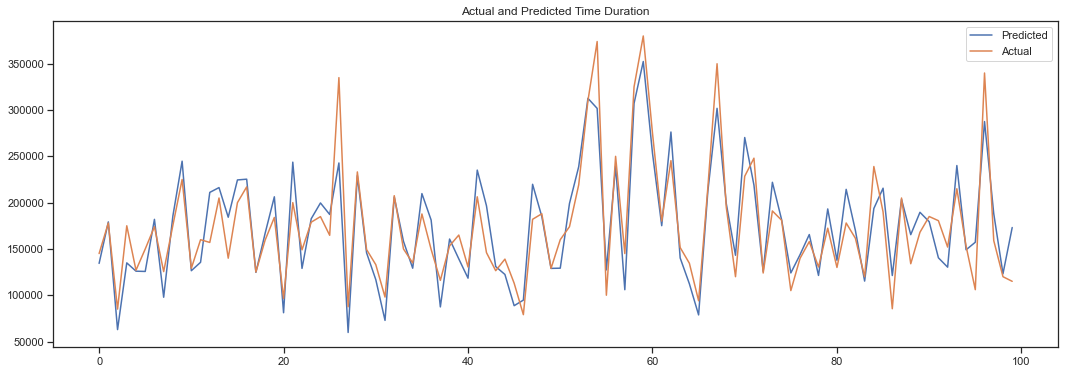

In [54]:
EvaluationMetric(X_train,y_train,y_pred_train)

Evaluation metrics for Test set

MSE : 1558239575.1511 RMSE : 39474.54338116022
R2 : 0.79684833042811 Adjusted R2 : 0.7896187336461922


(1558239575.1511, 39474.54338116022, 0.79684833042811, 0.7896187336461922)

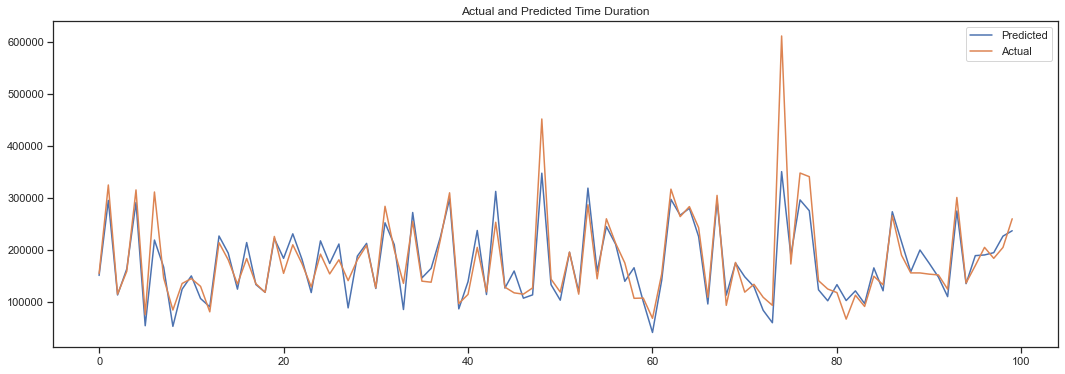

In [55]:
EvaluationMetric(X_test,y_test,y_pred_test)

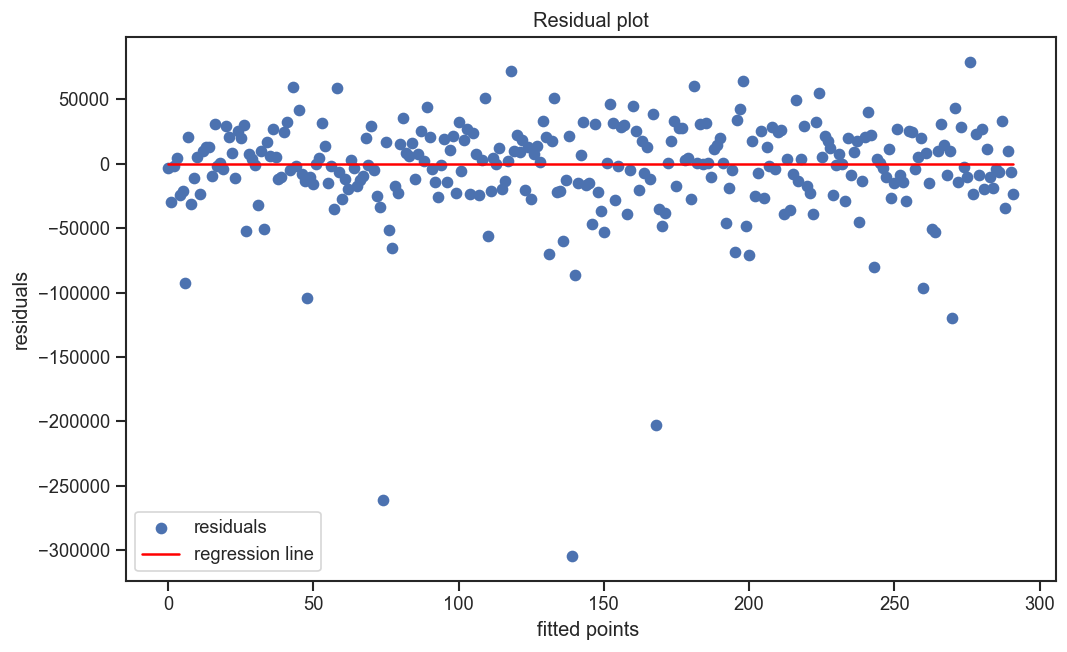

In [56]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

LightGBM

In [57]:
pip install LightGBM

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from lightgbm import LGBMRegressor

In [60]:
n_estimator=[5,10,20] # No. of tree
max_depth=[5,7,9] # max depth of tree
min_samples_split=[40,50]

params={"n_estimator":n_estimator,
        "max_depth":max_depth,
        "min_samples_split":min_samples_split}

lgb = LGBMRegressor()
gs_lgb = GridSearchCV(lgb,params,cv=3,verbose=2,scoring='r2')
gs_lgb.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; tot

[CV] END ..max_depth=9, min_samples_split=40, n_estimator=20; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ..max_depth=9, min_samples_split=40, n_estimator=20; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=9, min_samples_split=50, n_estimator=5; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=9, min_samples_split=50, n_estimator=5; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ...max_depth=9, min_samples_split=50, n_estimator=5; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator
[CV] END ..max_depth=9, min_samples_split=50,

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimator': [5, 10, 20]},
             scoring='r2', verbose=2)

In [61]:
print(gs_lgb.best_score_)
print(gs_lgb.best_params_)

0.8372157982465067
{'max_depth': 5, 'min_samples_split': 40, 'n_estimator': 5}


In [62]:
gs_lgb.best_estimator_

LGBMRegressor(max_depth=5, min_samples_split=40, n_estimator=5)

In [63]:
gs_lgb_opt_model = gs_lgb.best_estimator_

In [64]:
y_preds_lgb_test = gs_lgb_opt_model.predict(X_test)
y_pred_lgb_train = gs_lgb_opt_model.predict(X_train)

MSE : 508612246.2042 RMSE : 22552.433265707718
R2 : 0.9147274792196906 Adjusted R2 : 0.9139904652112176


(508612246.2042, 22552.433265707718, 0.9147274792196906, 0.9139904652112176)

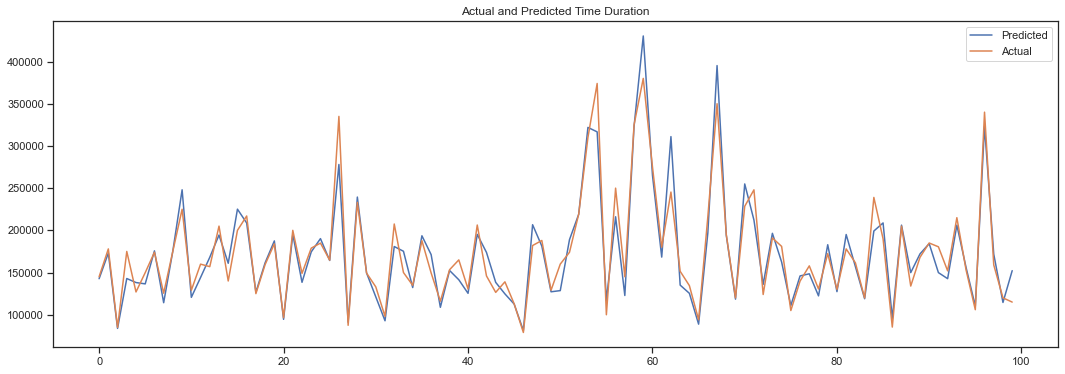

In [65]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lgb_train)

MSE : 1054542743.0125 RMSE : 32473.723885820364
R2 : 0.8625165717170689 Adjusted R2 : 0.8576239230237261


(1054542743.0125, 32473.723885820364, 0.8625165717170689, 0.8576239230237261)

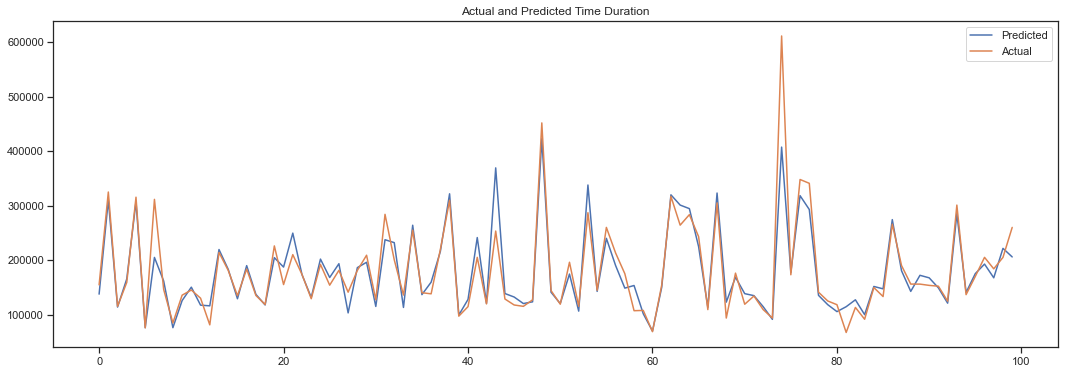

In [66]:
EvaluationMetric(X_test, y_test, y_preds_lgb_test)

In [67]:
# best_estimator

lgb_best = LGBMRegressor(max_depth=9, 
                         min_samples_split=40, 
                         n_estimator=5)

In [68]:
lgb_best.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: n_estimator


LGBMRegressor(max_depth=9, min_samples_split=40, n_estimator=5)

In [69]:
y_pred_best = lgb_best.predict(X_test)
r2_score(y_test,y_pred_best)

0.8617665514579331

In [70]:
importances = gs_lgb_opt_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
5,GrLivArea,192
4,1stFlrSF,161
3,TotalBsmtSF,154
9,GarageArea,150
1,YearBuilt,113
2,YearRemodAdd,92
7,TotRmsAbvGrd,69
0,OverallQual,60
8,GarageCars,27
6,FullBath,7


<AxesSubplot:title={'center':'Top 10 Features'}, xlabel='Feature', ylabel='Feature Importance'>

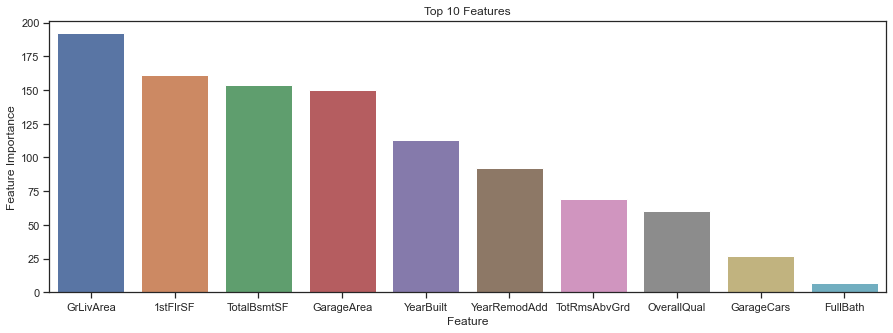

In [71]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

D:\Jayashri AVS\IT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


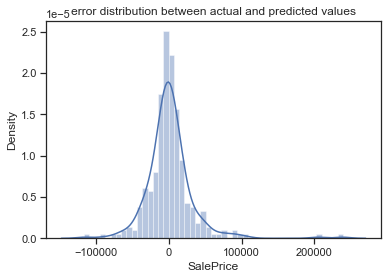

In [72]:
sns.distplot(y_test - y_preds_lgb_test ).set_title("error distribution between actual and predicted values")
plt.show()

Random Forest

In [73]:
rf_reg = RandomForestRegressor(random_state=7)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [74]:
y_pred = rf_reg.predict(X_test)
r2_score(y_pred,y_test)

0.8534741667619168

In [75]:
n_estimators = [90,100]
max_depth = (1,7,1)
min_samples_leaf = (1,7,1)
min_samples_split = (1,7,1)
max_features = ['auto','log2']

param = {
    "n_estimators" : n_estimators,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features' : max_features
}
rf_grid = GridSearchCV(rf_reg,param)
rf_grid.fit(X_train,y_train)

D:\Jayashri AVS\IT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Jayashri AVS\IT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Jayashri AVS\IT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "D:\Jayashri AVS\IT\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Jayashri AVS\IT\anacond

GridSearchCV(estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': (1, 7, 1),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': (1, 7, 1),
                         'min_samples_split': (1, 7, 1),
                         'n_estimators': [90, 100]})

In [76]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.8164931023523316
{'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 100}


In [77]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=7, max_features='log2', min_samples_leaf=7,
                      min_samples_split=7, random_state=7)

In [78]:
gs_rf_opt_model = rf_grid.best_estimator_

In [79]:
y_preds_rf_test = gs_lgb_opt_model.predict(X_test)
y_pred_rf_train = gs_lgb_opt_model.predict(X_train)

MSE : 508612246.2042 RMSE : 22552.433265707718
R2 : 0.9147274792196906 Adjusted R2 : 0.9139904652112176


(508612246.2042, 22552.433265707718, 0.9147274792196906, 0.9139904652112176)

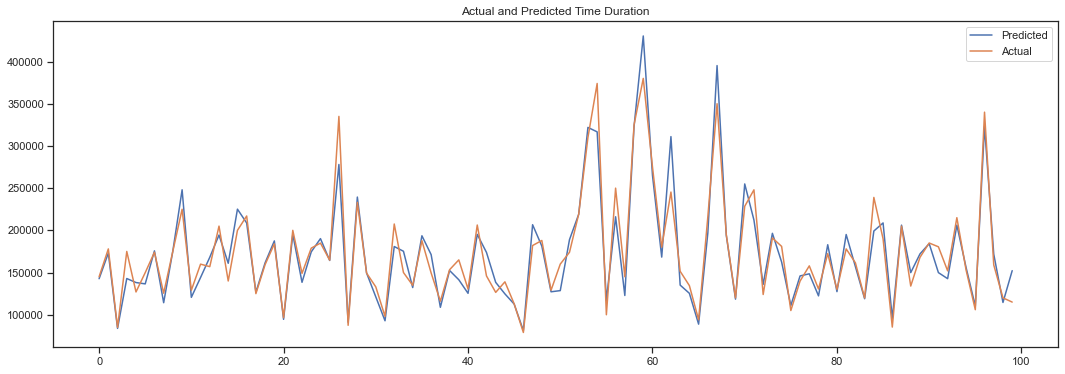

In [80]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_rf_train)

MSE : 1054542743.0125 RMSE : 32473.723885820364
R2 : 0.8625165717170689 Adjusted R2 : 0.8576239230237261


(1054542743.0125, 32473.723885820364, 0.8625165717170689, 0.8576239230237261)

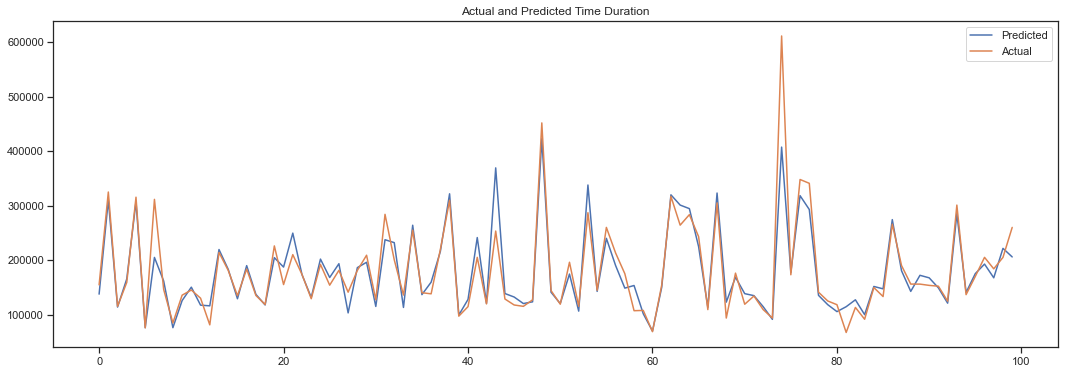

In [81]:
EvaluationMetric(X_test, y_test, y_preds_rf_test)

In [82]:
rf_best = RandomForestRegressor(max_depth=7, max_features='log2', min_samples_leaf=7,
                      min_samples_split=7, random_state=7)

In [83]:
rf_best.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_features='log2', min_samples_leaf=7,
                      min_samples_split=7, random_state=7)

In [84]:
y_pred_best = rf_best.predict(X_test)
r2_score(y_test,y_pred_best)

0.8390233102942198

In [85]:
importances = rf_best.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
0,OverallQual,0.318404
5,GrLivArea,0.186016
8,GarageCars,0.125541
1,YearBuilt,0.092148
3,TotalBsmtSF,0.082111
4,1stFlrSF,0.072134
9,GarageArea,0.055191
2,YearRemodAdd,0.024675
6,FullBath,0.023632
7,TotRmsAbvGrd,0.020150


<AxesSubplot:title={'center':'Top 10 Features'}, xlabel='Feature', ylabel='Feature Importance'>

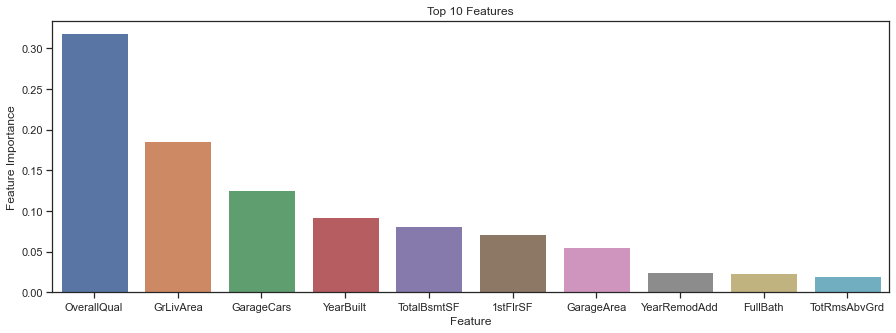

In [86]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

D:\Jayashri AVS\IT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


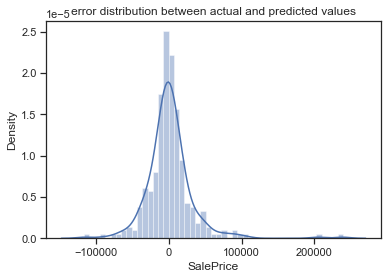

In [87]:
sns.distplot(y_test - y_preds_rf_test).set_title("error distribution between actual and predicted values")
plt.show()

test data and Submission

In [89]:
test = pd.read_csv("D:\Jayashri AVS\IT\Datasets for DS\House_Price_Test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [90]:
test.fillna(value=0, inplace=True)

# Replace infinite values with a large finite value or np.nan, and then handle the np.nan values as before
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(value=0, inplace=True)

In [91]:
# X_test  = test.select_dtypes(include=['number']).copy()
X_cols = col.copy()
X_test = test[X_cols[1:]]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1459 non-null   float64
 3   GarageArea    1459 non-null   float64
 4   TotalBsmtSF   1459 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [92]:
predictions = rf_reg.predict(X_test)

D:\Jayashri AVS\IT\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [94]:
solution = pd.read_csv("D:\Jayashri AVS\IT\Datasets for DS\House_Price_Sample_Submission.csv")
y_pred = solution["SalePrice"]

from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_pred, predictions) )
print("The score is %.5f" % RMSLE )

The score is 0.82021


In [96]:
submission = pd.DataFrame({"Id":test.index, "SalePrice":predictions})
submission.to_csv('D:\Jayashri AVS\IT\Datasets for DS\House_Price_Submission.csv', index=False)

In [98]:
submission = pd.read_csv('D:\Jayashri AVS\IT\Datasets for DS\House_Price_Submission.csv')
submission

,Id,SalePrice
0,0,379537.87
1,1,379537.87
2,2,416534.90
3,3,416534.90
4,4,416534.90
...,...,...
1454,1454,427969.93
1455,1455,379537.87
1456,1456,383588.94
1457,1457,427969.93
